# Import Libraries

In [3]:
import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Fuzzy Logic
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# ML
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score



---
# Import Datasets

*payment.csv*     : **paymentdf**  
*loan.csv*        : **loandf**   
*clarity_underwriting_variables.csv* : **claritydf**  

In [4]:
subdirectory = "data"
payment_path = os.path.join(subdirectory, "payment.csv")
loan_path = os.path.join(subdirectory, "loan.csv")
clarity_path = os.path.join(subdirectory, "clarity_underwriting_variables.csv")

In [5]:
paymentdf = pd.read_csv(payment_path)
loandf = pd.read_csv(loan_path)
claritydf = pd.read_csv(clarity_path)


/var/folders/4g/jfvz9fnd7blddks5n_g5qm3r0000gn/T/ipykernel_40223/4177701096.py:3: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  claritydf = pd.read_csv(clarity_path)


---
# 1. Exploratory Data Analysis

In [6]:
# Show all the columns name of each dataframe
print("paymentdf columns:\n", paymentdf.columns)
print("\nloandf columns:\n", loandf.columns)
print("\nclaritydf columns:\n", claritydf.columns)

paymentdf columns:
 Index(['loanId', 'installmentIndex', 'isCollection', 'paymentDate',
       'principal', 'fees', 'paymentAmount', 'paymentStatus',
       'paymentReturnCode'],
      dtype='object')

loandf columns:
 Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF'],
      dtype='object')

claritydf columns:
 Index(['.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago',
       '.underwritingdataclarity.clearfraud.clearf

In [7]:
# Rename the columns name of claritydf, change all columns consist of ".underwritingdataclarity.clearfraud" to ""
# For better readability
claritydf.columns = [col.replace(".underwritingdataclarity.clearfraud.clear", "") for col in claritydf.columns]
claritydf.columns


Index(['fraudinquiry.thirtydaysago', 'fraudinquiry.twentyfourhoursago',
       'fraudinquiry.oneminuteago', 'fraudinquiry.onehourago',
       'fraudinquiry.ninetydaysago', 'fraudinquiry.sevendaysago',
       'fraudinquiry.tenminutesago', 'fraudinquiry.fifteendaysago',
       'fraudinquiry.threesixtyfivedaysago',
       'fraudindicator.inquiryonfilecurrentaddressconflict',
       'fraudindicator.totalnumberoffraudindicators',
       'fraudindicator.telephonenumberinconsistentwithaddress',
       'fraudindicator.inquiryageyoungerthanssnissuedate',
       'fraudindicator.onfileaddresscautious',
       'fraudindicator.inquiryaddressnonresidential',
       'fraudindicator.onfileaddresshighrisk',
       'fraudindicator.ssnreportedmorefrequentlyforanother',
       'fraudindicator.currentaddressreportedbytradeopenlt90days',
       'fraudindicator.inputssninvalid',
       'fraudindicator.inputssnissuedatecannotbeverified',
       'fraudindicator.inquiryaddresscautious',
       'fraudindicator.m

In [8]:
# Show the data types of each column of loandf
print("\n------------Data Types-----------------")
print(loandf.dtypes)
print("\n--------------Shape--------------------")
print("Shape:", loandf.shape)

# Count missing values for each column
print("\n------------Missing Values-----------------")
print(loandf.isnull().sum())

# Count number of unique values for each column
print("\n------------Unique Values-----------------")
print(loandf.nunique())

# loandf data summary
print("\n------------Summary-----------------")
print(loandf.describe())

# Show the first 5 rows of loandf
print("\n------------First 5 rows-----------------")
loandf.head()


------------Data Types-----------------
loanId                               object
anon_ssn                             object
payFrequency                         object
apr                                 float64
applicationDate                      object
originated                             bool
originatedDate                       object
nPaidOff                            float64
approved                               bool
isFunded                              int64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
clarityFraudId                       object
hasCF                                 int64
dtype: object

--------------Shape--------------------
Shape: (577682, 19)

------------Missing Values-----------------
loa

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


---
# 2. Data Preprocessing

---
## 2.1 Preprocess paymentdf / payment.csv for target variable
- From payment.csv / paymentdf, we can see that a good borrower will successfully complete most of the repayment. along all the installments. While a bad borrower will unable to complete theiry repayments on time.
- This can be indicated by numerous of "Checked" value in column *paymentStatus* of a *loanId*.
- Thus, I plan to calculate the percentage of "Checked" value over the number of installments, noted as checked.
- For example, if there are 12 records for a loan and 4 records contains "Checked" then the value will be 4/12, 0.33


In [9]:
# Create a new dataframe with "loanId" and "relativeCheckedFrequency" columns
# For each loanId in paymentdf, calculate the relativeCheckedFrequency.
# relativeCheckedFrequency =  number of value "Checked" / total number of rows of the loanId
# For example, if there are 3 rows with value "Checked" and 2 rows with value "Unchecked" for a loanId,
# then the relativeCheckedFrequency = 3 / (3 + 2) = 0.6s

# Calculate the relativeCheckedFrequency for each loanId
grouped = paymentdf.groupby('loanId')['paymentStatus'].apply(lambda x: (x == 'Checked').sum() / len(x))

# Create a new DataFrame with 'loanId' and 'relativeCheckedFrequency' columns
checkedFrequencyDf = pd.DataFrame({'loanId': grouped.index, 'relativeCheckedFrequency': grouped.values})

# Output the new checkedFrequencyDf
print(checkedFrequencyDf)

# combine checkedFrequencyDf with loandf by using loan ID
modelDf = pd.merge(loandf, checkedFrequencyDf, on='loanId', how='left')

# Impute the null values with -0.1
modelDf['relativeCheckedFrequency'] = modelDf['relativeCheckedFrequency'].fillna(-0.1)

modelDf.head()


              loanId  relativeCheckedFrequency
0      LL-I-00000021                  0.923077
1      LL-I-00000231                  0.100000
2      LL-I-00000238                  0.437500
3      LL-I-00000308                  0.045455
4      LL-I-00000355                  0.000000
...              ...                       ...
39947  LP-I-00000127                  1.000000
39948  LP-I-00000134                  0.142857
39949  LP-I-00000139                  0.800000
39950  LP-I-00000142                  0.000000
39951  LP-I-00000145                  1.000000

[39952 rows x 2 columns]


,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,relativeCheckedFrequency
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1,-0.10
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,0.88
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1,-0.10
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1,-0.10
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1,-0.10


Now, we will try to verify whether relativeCheckedFrequency is a reflected the status of a borrower.  
We will do 2 test:  
1. Test whether relativeCheckedFrequency is correlated with loanStatus = "Paid Off Loan", "Paid Off Loan" borrower should has higher relativeCheckedFrequency.  
   
2. Test whether relativeCheckedFrequency is correlated with loanStatus = "Defaulted Loan", "Defaulted Loan" borrower should has lower relativeCheckedFrequency.


               loanId                          anon_ssn payFrequency    apr   
1       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0  \
47      LL-I-16519347  bc9fa73468acf18cb968a3a6a3c4697c            S  490.0   
54      LL-I-11506719  10cefd11d41612b032fd9cd2debe32dc            B  590.0   
64      LL-I-09279047  1d249e27292d25e4d3b4bc142a2a4aea            W  404.1   
98      LL-I-01316580  2a10b2e04c5eec9a47a8cf5b9b81a2b8            W  590.0   
...               ...                               ...          ...    ...   
577505  LL-I-15390953  c81e355845a451b77c29b6515efa2578            B  645.0   
577564  LL-I-12367915  55392b05f72f8c3e32e5157612406ba8            B  565.0   
577590  LL-I-15280684  73690518af906288434b2a0cfd972fe0            M  645.0   
577617  LL-I-09897110  0538f828b4a0b44502ead5a8033ee779            B  449.0   
577662  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   

                   applicationDate  originated     

/var/folders/4g/jfvz9fnd7blddks5n_g5qm3r0000gn/T/ipykernel_40223/3363172852.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paidOffDf['relativeCheckedFrequency_class'] = pd.cut(paidOffDf['relativeCheckedFrequency'], bins, right = True, include_lowest = True)


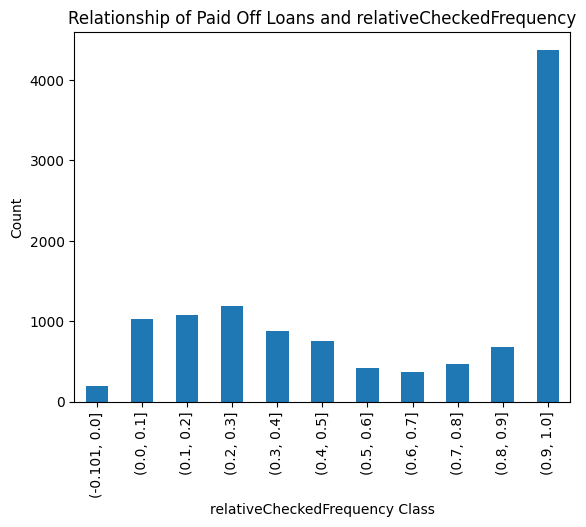

Notes: class (-0.1,0.0] are null values, which we do not have any payment record in payment.csv


In [10]:
# Select row with value Paid Off Loan in loanStatus column
paidOffDf = modelDf[modelDf['loanStatus'] == 'Paid Off Loan']

# Define the boundaries of the classes you're interested in
bins = [x for x in np.arange(-0.1, 1.05, 0.1)]

# Create a new column 'relativeCheckedFrequency_class' that indicates which class each value falls into
paidOffDf['relativeCheckedFrequency_class'] = pd.cut(paidOffDf['relativeCheckedFrequency'], bins, right = True, include_lowest = True)

# Plot the histogram
paidOffDf['relativeCheckedFrequency_class'].value_counts().sort_index().plot(kind='bar')
print(paidOffDf)
# Add labels and title, then show the plot
plt.xlabel('relativeCheckedFrequency Class')
plt.ylabel('Count')
plt.title('Relationship of Paid Off Loans and relativeCheckedFrequency')
plt.show()
print("Notes: class (-0.1,0.0] are null values, which we do not have any payment record in payment.csv")

We observed that the relativeCheckedFrequency is highly associated with the loanStatus of "Paid Off".  
When the loanStatus is "Paid Off", the relativeCheckedFrequency is higher.  
We proved Test 1.  
  
Now we will try with "Defaulted Loan" for Test 2.

/var/folders/4g/jfvz9fnd7blddks5n_g5qm3r0000gn/T/ipykernel_40223/3767548955.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaultedDf['relativeCheckedFrequency_class'] = pd.cut(defaultedDf['relativeCheckedFrequency'], bins, right = True, include_lowest = True)


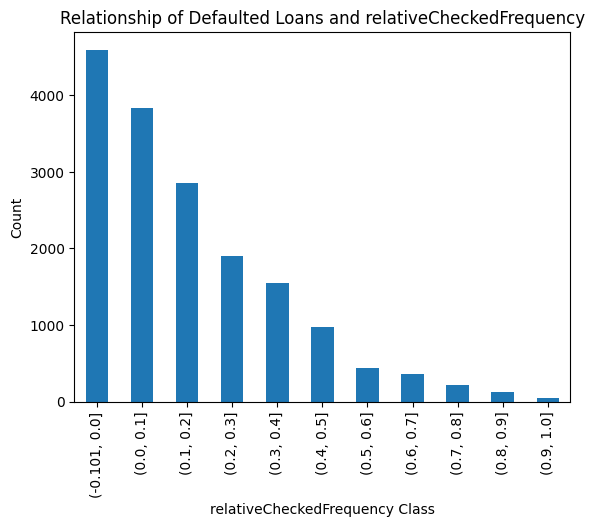

Notes: class (-0.1,0.0] are null values, which we do not have any payment record in payment.csv


In [11]:
# Select row with value Paid Off Loan in loanStatus column
defaultedStatus = ['Internal Collection', 'External Collection']
defaultedDf = modelDf[modelDf['loanStatus'].isin(defaultedStatus)]

# Define the boundaries of the classes you're interested in
bins = [x for x in np.arange(-0.1, 1.05, 0.1)]

# Create a new column 'relativeCheckedFrequency_class' that indicates which class each value falls into
defaultedDf['relativeCheckedFrequency_class'] = pd.cut(defaultedDf['relativeCheckedFrequency'], bins, right = True, include_lowest = True)

# Plot a histogram
defaultedDf['relativeCheckedFrequency_class'].value_counts().sort_index().plot(kind='bar')

# Add labels and title, plot the figure
plt.xlabel('relativeCheckedFrequency Class')
plt.ylabel('Count')
plt.title('Relationship of Defaulted Loans and relativeCheckedFrequency')
plt.show()
print("Notes: class (-0.1,0.0] are null values, which we do not have any payment record in payment.csv")

/var/folders/4g/jfvz9fnd7blddks5n_g5qm3r0000gn/T/ipykernel_40223/1519022488.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaultedDf['relativeCheckedFrequency_class'] = pd.cut(defaultedDf['relativeCheckedFrequency'], bins , right = True, include_lowest = True)


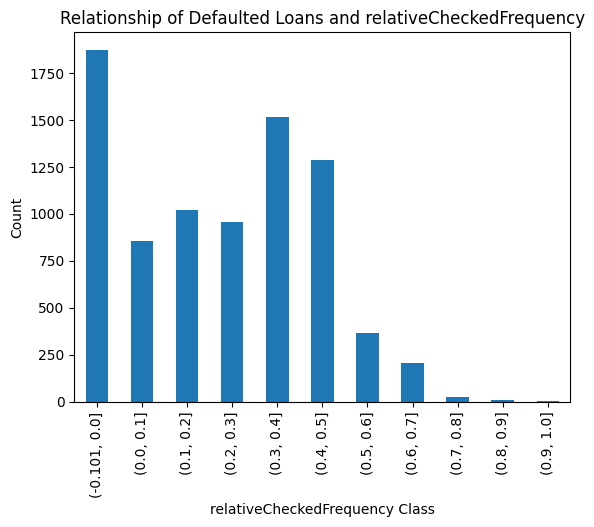

Notes: class (-0.1,0.0] are null values, which we do not have any payment record in payment.csv


In [12]:
# Select row with value Paid Off Loan in loanStatus column
defaultedStatus = ['New Loan']
defaultedDf = modelDf[modelDf['loanStatus'].isin(defaultedStatus)]

# Define the boundaries of the classes you're interested in
bins = [x for x in np.arange(-0.1, 1.05, 0.1)]

# Create a new column 'relativeCheckedFrequency_class' that indicates which class each value falls into
defaultedDf['relativeCheckedFrequency_class'] = pd.cut(defaultedDf['relativeCheckedFrequency'], bins , right = True, include_lowest = True)

# Plot a histogram
defaultedDf['relativeCheckedFrequency_class'].value_counts().sort_index().plot(kind='bar')

# Add labels and title, plot the figure
plt.xlabel('relativeCheckedFrequency Class')
plt.ylabel('Count')
plt.title('Relationship of Defaulted Loans and relativeCheckedFrequency')
plt.show()
print("Notes: class (-0.1,0.0] are null values, which we do not have any payment record in payment.csv")

We observed that the relativeCheckedFrequency is highly associated with the loanStatus of Debt Collection ('Internal Collection', 'External Collection').  
When the loanStatus is "Debt Collection", the relativeCheckedFrequency is low.   
We proved Test 2.   

**In conclusion, we can use relativeCheckedFrequency as an element to indicate the quality of loan.**  
**In other words, we may involve *relativeCheckedFrequency* in our target variable.**

---
## 2.2 Preprocess loandf / loan.csv   
   
Potentially unuseful columns
- *originatedDate*
    - Only include it, if we are considering the timeline application is submitted
- *isFunded*
    - The loan is ultimately funded depends on the willingness of candidates, thus, it does not affect the qualification of a candidate.

Notes:
- Consider relationship of *loanStatus* and *approved* 
    - Even though the *approved* is false, but it might due to application withdrawal, which doesn't mean he/she a unqualified candidate

Target Variable
- *loanStatus* will be the first prioritised target value

Question:
- What is the relationship of *loanAmount* and *originallyScheduledPaymentAmount*?


### 2.2.1 Preprocess loandf Target Variable - *loanStatus*

In [13]:
# Count every unique values in column loanStatus
print(loandf["loanStatus"].value_counts())

loanStatus
Withdrawn Application          450984
Rejected                        85070
Paid Off Loan                   11427
External Collection             11334
New Loan                         8112
Internal Collection              5567
Returned Item                    1182
CSR Voided New Loan              1026
Settlement Paid Off               708
Credit Return Void                704
Customer Voided New Loan          504
Settled Bankruptcy                326
Pending Paid Off                  169
Charged Off Paid Off              160
Pending Application Fee             5
Pending Rescind                     4
Pending Application                 4
Voided New Loan                     2
Charged Off                         1
Customver Voided New Loan           1
Settlement Pending Paid Off         1
Name: count, dtype: int64


#### 2.2.1.1 Remove small classes that frequency has lower than 100 to reduce the complexity of the model.

In [14]:
# Identify the rows the with less than 50 records in column loanStatus
small_class_loanStatus_values_list = loandf["loanStatus"].value_counts()[loandf["loanStatus"].value_counts() < 50]

# Drop row of loanStatus with these values in small_class_loanStatus_values_list
loandf = loandf[~loandf["loanStatus"].isin(small_class_loanStatus_values_list.index)]


#### 2.2.1.2 Process (remove & combine) classes of loanStatus

In [15]:
# Count every unique values in column loanStatus
print(loandf["loanStatus"].value_counts())

loanStatus
Withdrawn Application       450984
Rejected                     85070
Paid Off Loan                11427
External Collection          11334
New Loan                      8112
Internal Collection           5567
Returned Item                 1182
CSR Voided New Loan           1026
Settlement Paid Off            708
Credit Return Void             704
Customer Voided New Loan       504
Settled Bankruptcy             326
Pending Paid Off               169
Charged Off Paid Off           160
Name: count, dtype: int64


We can see that there are many classes to be predicted. We will remove meaningless classes, combine similar classes until left "Defaulted Loan" & "Paid Off Loan" only.

1. We will remove "Withdrawn Application", "Rejected", "CSR Voided New Loan", "Customer Voided New Loan", "Credit Return Void" because these applications are not yet classified thus it is meaningless.
   - I assume "Withdrawn Application" is the application that is withdrawn by the applicant, thus it is not yet classified.
   - I assume "Rejected" is due to the applicant didn't submit the required documents, thus it is not yet classified.
   - I do not know why "CSR Voided New Loan", thus it will be removed until further information is provided.
   - I assume "Customer Voided New Loan" is due to the applicant changed his/her mind, thus it is not yet classified.  
   - I assume "Credit Return Void" is due to the applicant voided its own loan after funded, thus it is not yet classified.
\    
2. We will assume "External Collection" and "Internal Collection" as "Defaulted Loan".
   - I assume "External Collection" is the loan that is being collected by external collection agency, thus it was defaulted.
   - I assume "Internal Collection" is the loan that is being collected by internal collection deparment, thus it was defaulted.  
\  
3. "Settlement Paid Off", "Settled Bankruptcy", "Charged Off Paid Off" will be considered "Defaulted Loan"
   - For "Settlement Paid Off", I assume the borrower was unable to repay the full loan amount, so they agreed with the lender to pay a lesser amount to satisfy the debt, thus considered as defaulted.
   - For "Settled Bankruptcy", I assume the borrower declared bankruptcy, and the debt was included and resolved in the bankruptcy proceedings, thus considered as defaulted.
   - For "Charged Off Paid Odd", The loan was declared as a loss by the lender (charged off), but was subsequently paid off by the borrower or collections. However, it is still considered as defaulted.  
\  
4. "Pending Paid Off" will be assumed as "Paid Off Loan"

5. "New Loan" "Returned Item" will be considered "Uncertain Loan"
   - I assume "New Loan" is the loan that is newly approved, have few repayment records in payment.csv, but cannot fully determine the quality of loan yet.
   - I assume "Returned Item" is the loan that is being returned due to borrower has not enough fund to repay, but cannot fully determine the quality of loan is bad yet.

We will try to label the target value accordingly, like Paid Off Loan will be the best condition.

In [16]:
# We will remove "Withdrawn Application", "Rejected", "CSR Voided New Loan", "Customer Voided New Loan".
removedClasses = ["Withdrawn Application", "Rejected", "CSR Voided New Loan", "Customer Voided New Loan", "Credit Return Void"]
loandf = loandf[~loandf["loanStatus"].isin(removedClasses)]

# We will assume "External Collection" and "Internal Collection","Settlement Paid Off", "Settled Bankruptcy", "Charged Off Paid Off" as "Defaulted Loan".
loandf["loanStatus"] = loandf["loanStatus"].replace("External Collection", "Defaulted Loan")
loandf["loanStatus"] = loandf["loanStatus"].replace("Internal Collection", "Defaulted Loan")
loandf["loanStatus"] = loandf["loanStatus"].replace("Settlement Paid Off", "Defaulted Loan")
loandf["loanStatus"] = loandf["loanStatus"].replace("Settled Bankruptcy", "Defaulted Loan")
loandf["loanStatus"] = loandf["loanStatus"].replace("Charged Off Paid Off", "Defaulted Loan")

# "Pending Paid Off" will be assumed as "Paid Off Loan"
loandf["loanStatus"] = loandf["loanStatus"].replace("Pending Paid Off", "Paid Off Loan")

# "New Loan" "Returned Item" will be considered "Uncertain Loan"   
loandf["loanStatus"] = loandf["loanStatus"].replace("New Loan", "Uncertain Loan")
loandf["loanStatus"] = loandf["loanStatus"].replace("Returned Item", "Uncertain Loan")


And now, we should left only 3 categories, which are "Defaulted Loan", "Paid Off Loan", "Uncertain Loan".

In [17]:
# Count every unique values in column loanStatus
print(loandf["loanStatus"].value_counts())

loanStatus
Defaulted Loan    18095
Paid Off Loan     11596
Uncertain Loan     9294
Name: count, dtype: int64


### 2.2.2 Preprocess loandf Feature Variables

#### 2.2.2.1 Duplicates

In [18]:
# Check duplicates in loandf
# Check any repeated rows
print("Number of duplicated rows:", loandf.duplicated().sum())

# print "No duplicates found" if there is no duplicated rows
if loandf.duplicated().sum() > 0:
    print("Duplicates found")
else:
    print ("No duplicates found.")




Number of duplicated rows: 0
No duplicates found.


#### 2.2.2.2 Remove unwanted columns  
Columns to be dropped:

- *loanId* (will be dropped after combining with paymentdf)
    - Doesn't affect the qualification of borrower, but used as reference to claritydf.
- *applicationDate*
    - Only include it, if we are considering the timeline application is submitted
- *anon_ssn*
    - An identifier which doesn't affect the qualification of borrower.
- *originated*
    - Orginated or not will not affect the qualification of a borrower, however, an orginated application is a pre-condition for a loan to be approved, thus, it will cause data leakage. 
- *originatedDate*
    - Only include it, if we are considering the timeline application is submitted
    - Too many missing values
- *isFunded*
    - Whether the loan will be ultimately funded depends on the willingness of borrower, thus, it does not affect the qualification of a borrower.
    - This will also cause data leakage, because *isFunded* will only be known after *loanStatus* is determined.
- *approved*
    - This will also cause data leakage, because *loanStatus* is strongly relying on the value of *approved*, we should able to predict loanStatus before approval is given.


In [19]:
# Drop the columns stated above
loandf.drop([ "originated", "anon_ssn", "applicationDate", "originatedDate", "isFunded", "approved"], axis=1, inplace=True)

#### 2.2.2.3 Impute missing value

In [20]:
# Show the data types of each column of loandf
print("\n------------Data Types-----------------")
print(loandf.dtypes)
print("\n--------------Shape--------------------")
print("Shape:", loandf.shape)

# Count missing values for each column
print("\n------------Missing Values-----------------")
print(loandf.isnull().sum())

# Count number of unique values for each column
print("\n------------Unique Values-----------------")
print(loandf.nunique())


------------Data Types-----------------
loanId                               object
payFrequency                         object
apr                                 float64
nPaidOff                            float64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
clarityFraudId                       object
hasCF                                 int64
dtype: object

--------------Shape--------------------
Shape: (39376, 13)

------------Missing Values-----------------
loanId                               256
payFrequency                           4
apr                                  256
nPaidOff                              21
loanStatus                           391
loanAmount                           256
originallyScheduledPay

In [21]:
# List the unique values for all columns
print("\n------------Unique Values-----------------")
print("payFrequency:", loandf["payFrequency"].unique())
print("\napr:", loandf["apr"].unique())
print("\nnPaidOff:", loandf["nPaidOff"].unique())
print("\nloanStatus:", loandf["loanStatus"].unique())
print("\nloanAmount:", loandf["loanAmount"].unique())
print("\noriginallyScheduledPaymentAmount:", loandf["originallyScheduledPaymentAmount"].unique())
print("\nstate:", loandf["state"].unique())
print("\nleadType:", loandf["leadType"].unique())
print("\nleadCost:", loandf["leadCost"].unique())
print("\nfpStatus:", loandf["fpStatus"].unique())
print("\nclarityFraudId:", loandf["clarityFraudId"].unique())
print("\nhasCF:", loandf["hasCF"].unique())




------------Unique Values-----------------
payFrequency: ['B' 'W' 'S' 'M' 'I' nan]

apr: [199.     475.     645.     490.     590.     404.1    315.     601.
 449.99   550.     625.     359.     472.     325.     404.991  360.
 516.25   680.     681.     390.     441.     251.     650.     159.
 208.     595.875       nan 465.     501.5    525.     180.2    306.
 217.     580.     585.     540.     290.     324.     449.     478.67
 442.89   531.     600.     381.65   565.      95.     568.75   139.125
 231.     427.5    570.32   500.     510.     540.9    440.     300.
 562.5    515.      44.     241.     416.5    340.     288.     265.
 552.5    240.     505.     415.     194.     382.4915 355.     239.
   0.     555.     546.875  242.     612.9    160.     480.     400.
 510.85   531.25   428.75   530.     182.     171.     455.     705.59
 143.1    365.     578.     351.     564.375  660.      29.99   439.
  36.     392.     578.85   228.     341.25   415.625  640.      85.5
 403.

Way to address columns with missing value:
- payFrequency: Impute value with mode, which is "B" (bi-weekly)
- nPaidOff: Impute value '0' if missing
- loanAmount: Drop row because missing loanAmount also mean the loan is invalid too (We found all loanStatus with missing loanAmount is also null values)
- loanStatus: Drop rows with missing loanStatus because it is the target variable
- apr: Drop rows with missing apr because the loan application is invalid
- fpStatus: Impute with 'None' as dictionary stated how it should be.

In [22]:
# Address missing values for each column

# nPaidOff
# Drop missing values rows in nPaidOff column
loandf.dropna(subset=["nPaidOff"], inplace=True)

# payFrequency
# Impute mode value for missing values in payFrequency column
# What is the mode of payFrequency column?
loandf["payFrequency"].fillna(loandf["payFrequency"].mode()[0], inplace=True)

# loanAmount
# Drop missing values rows in loanAmount column
loandf.dropna(subset=["loanAmount"], inplace=True)

# loanStatus
# Drop missing values rows in loanStatus column
loandf.dropna(subset=["loanStatus"], inplace=True)

# apr
# Drop missing values rows in apr column
loandf.dropna(subset=["apr"], inplace=True)

# fpStatus
# Impute with 'None' for missing values in fpStatus column
loandf["fpStatus"].fillna("None", inplace=True)


In [23]:
# Show the data types of each column of loandf
print("\n------------Data Types-----------------")
print(loandf.dtypes)
print("\n--------------Shape--------------------")
print("Shape:", loandf.shape)

# Count missing values for each column
print("\n------------Missing Values-----------------")
print(loandf.isnull().sum())

# Count number of unique values for each column
print("\n------------Unique Values-----------------")
print(loandf.nunique())


------------Data Types-----------------
loanId                               object
payFrequency                         object
apr                                 float64
nPaidOff                            float64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
clarityFraudId                       object
hasCF                                 int64
dtype: object

--------------Shape--------------------
Shape: (38964, 13)

------------Missing Values-----------------
loanId                                 0
payFrequency                           0
apr                                    0
nPaidOff                               0
loanStatus                             0
loanAmount                             0
originallyScheduledPay

---
## 2.3 Preprocess claritydf / clarity_underwriting_variables.csv

#### 2.3.1 Combine claritdydf with loandf

We combine only clearFraudScore because we assume clearFraudScore has conclude all other fraud features.

In [24]:
# Combine claritydf['clearFraudScore'] with loandf by using clarityFraudId & underwritingid
claritydf = claritydf.rename(columns={"underwritingid": "clarityFraudId"})
# Remove all other columns except clearFraudScore and clarityFraudId
claritydf = claritydf[['clarityFraudId','clearfraudscore']]

loan_claritydf = pd.merge(loandf, claritydf, on='clarityFraudId', how='left')


# drop clarityFraudId column
loan_claritydf.drop(["clarityFraudId"], axis=1, inplace=True)

In [25]:
# Show the data types of each column of loan_claritydf
print("\n------------Data Types-----------------")
print(loan_claritydf.dtypes)
print("\n--------------Shape--------------------")
print("Shape:", loan_claritydf.shape)

# Count missing values for each column
print("\n------------Missing Values-----------------")
print(loan_claritydf.isnull().sum())

# Count number of unique values for each column
print("\n------------Unique Values-----------------")
print(loan_claritydf.nunique())


------------Data Types-----------------
loanId                               object
payFrequency                         object
apr                                 float64
nPaidOff                            float64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
hasCF                                 int64
clearfraudscore                     float64
dtype: object

--------------Shape--------------------
Shape: (38964, 13)

------------Missing Values-----------------
loanId                                 0
payFrequency                           0
apr                                    0
nPaidOff                               0
loanStatus                             0
loanAmount                             0
originallyScheduledPay

#### 2.3.2 Impute Missing Values of clearfraudscore 

count    49615.000000
mean       683.769787
std        126.205372
min        122.000000
25%        592.000000
50%        691.000000
75%        783.000000
max        965.000000
Name: clearfraudscore, dtype: float64


<Axes: ylabel='Frequency'>

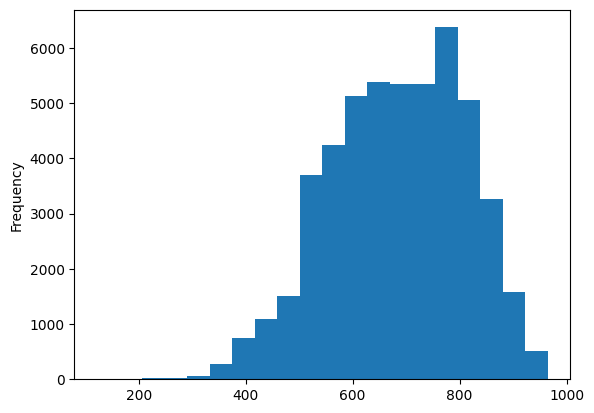

In [26]:
# Check the distribution of clearfraudscore in claritydf
print(claritydf['clearfraudscore'].describe())

# Plot the histogram
claritydf['clearfraudscore'].plot(kind='hist', bins=20)


The distribution has long left tail, we will take a most right value of central tendacy measure which is **mode**.  
The reason is that we want to increase the overall threshold of being classified as good loan, which is "paid off loan".

In [27]:
# Impute missing clearfraudscore with mode value.
loan_claritydf['clearfraudscore'].fillna(loan_claritydf['clearfraudscore'].mode()[0], inplace=True)

## 2.4 Combine loan_claritydf with paymentdf['relativeCheckedFrequency']

<Axes: ylabel='Frequency'>

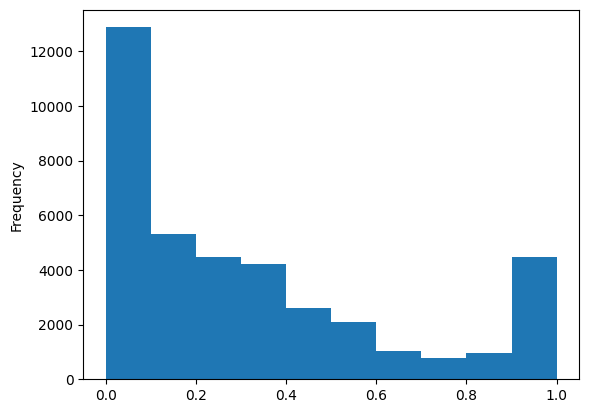

In [28]:
# Combine loan_claritydf with paymentdf['relativeCheckedFrequency'] by using loanId
modeldf = pd.merge(loan_claritydf, checkedFrequencyDf, on='loanId', how='left')

# Drop loanId column
modeldf.drop(["loanId"], axis=1, inplace=True)

# Visualize the distribution of relativeCheckedFrequency
modeldf['relativeCheckedFrequency'].plot(kind='hist', bins=10)

# Impute missing values with mode value
# modeldf['relativeCheckedFrequency'].fillna(modeldf['relativeCheckedFrequency'].mode()[0], inplace=True)


In [29]:
# Show the data types of each column of modeldf
print("\n------------Data Types-----------------")
print(modeldf.dtypes)
print("\n--------------Shape--------------------")
print("Shape:", modeldf.shape)

# Count missing values for each column
print("\n------------Missing Values-----------------")
print(modeldf.isnull().sum())

# Count number of unique values for each column
print("\n------------Unique Values-----------------")
print(modeldf.nunique())


------------Data Types-----------------
payFrequency                         object
apr                                 float64
nPaidOff                            float64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
hasCF                                 int64
clearfraudscore                     float64
relativeCheckedFrequency            float64
dtype: object

--------------Shape--------------------
Shape: (38964, 13)

------------Missing Values-----------------
payFrequency                          0
apr                                   0
nPaidOff                              0
loanStatus                            0
loanAmount                            0
originallyScheduledPaymentAmount      0
state                       

This is the final outline of dataset we will use for modelling.
Now, we need to further preprocess it.

## 2.5 Model Data Preprocessing

### 2.5.1 Encode Nominal Variables

In [30]:
nominal_variables = ['payFrequency', 'loanStatus', 'state', 'leadType', 'fpStatus']

# Print unique values for each nominal variables
print("\n------------Unique Values-----------------")
for col in nominal_variables:
    print(col, ":", modeldf[col].unique())
    print("\n")


------------Unique Values-----------------
payFrequency : ['B' 'W' 'S' 'M' 'I']


loanStatus : ['Paid Off Loan' 'Uncertain Loan' 'Defaulted Loan']


state : ['CA' 'MO' 'NJ' 'WI' 'IL' 'MI' 'FL' 'SC' 'OH' 'NV' 'IN' 'VA' 'TN' 'OK'
 'NC' 'TX' 'PA' 'HI' 'MS' 'KY' 'AL' 'GA' 'NM' 'ID' 'ND' 'AZ' 'CO' 'NE'
 'SD' 'MN' 'LA' 'CT' 'WY' 'KS' 'DE' 'WA' 'UT' 'RI' 'IA' 'AK' 'MD']


leadType : ['prescreen' 'organic' 'lead' 'bvMandatory' 'rc_returning' 'california'
 'instant-offer' 'express' 'repeat' 'lionpay']


fpStatus : ['Checked' 'Rejected' 'Skipped' 'Cancelled' 'None' 'Pending' 'Returned'
 'No Payments']




Way to address nominal variables:  
Nominal Target Variable:  
- loanStatus: ['Paid Off Loan' 'Uncertain Loan' 'Defaulted Loan'] ---> [1 0 -1]  
  
Feature Variables  
- payFrequency:
    - Because ['B' 'W' 'S' 'M' 'I'] stand for
        - B is biweekly payments
        - I is irregular
        - M is monthly
        - S is semi monthly
        - W is weekly
    - Thus, we will use Ordinal Encoding with sequence [W, B, S, M, I] ---> [0, 1, 2, 3, 4]

- state: we will OneHotEncode it.

- leadtype: we will OneHotEncode it.

- fpSatus: we will OneHotEncode it.


In [31]:
# Nominal Target Variable  
# convert loanStatus: ['Paid Off Loan' 'Uncertain Loan' 'Defaulted Loan'] ---> [1 0 -1]  
modeldf['loanStatus'] = modeldf['loanStatus'].map({'Paid Off Loan': 1, 'Uncertain Loan': 0, 'Defaulted Loan': -1})

# Feature Variables  
# payFrequency
# Ordinal Encode with sequence [W, B, S, M, I] ---> [0, 1, 2, 3, 4]
modeldf['payFrequency'] = modeldf['payFrequency'].map({'W': 0, 'B': 1, 'S': 2, 'M': 3, 'I': 4})

# OneHotEncode state
modeldf = pd.get_dummies(modeldf, columns=['state'])

# OneHotEncode leadtype
modeldf = pd.get_dummies(modeldf, columns=['leadType'])

# OneHotEncode fpSatus
modeldf = pd.get_dummies(modeldf, columns=['fpStatus'])


In [32]:
# Show all columns name of modeldf
print("modeldf columns:\n", modeldf.columns)

# Show all data types of modeldf
print("\n------------Data Types-----------------")
print(modeldf.dtypes)

modeldf columns:
 Index(['payFrequency', 'apr', 'nPaidOff', 'loanStatus', 'loanAmount',
       'originallyScheduledPaymentAmount', 'leadCost', 'hasCF',
       'clearfraudscore', 'relativeCheckedFrequency', 'state_AK', 'state_AL',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MD', 'state_MI', 'state_MN',
       'state_MO', 'state_MS', 'state_NC', 'state_ND', 'state_NE', 'state_NJ',
       'state_NM', 'state_NV', 'state_OH', 'state_OK', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_WA', 'state_WI', 'state_WY', 'leadType_bvMandatory',
       'leadType_california', 'leadType_express', 'leadType_instant-offer',
       'leadType_lead', 'leadType_lionpay', 'leadType_organic',
       'leadType_prescreen', 'leadType_rc_returning', 'leadType_repeat',
       'fpStatus

### 2.5.2 Systhesize Target Variable
Now we have 2 columns that can be used as target variables, which are *loanStatus* and *relativeCheckedFrequency*.  
Thus, we need to combine them into 1 variable.  
We are going to use fuzzy logic to combine them.  

/Users/ahdean/.pyenv/versions/3.11.3/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


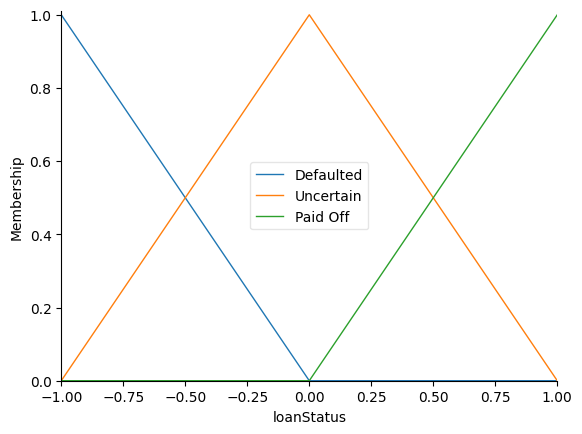

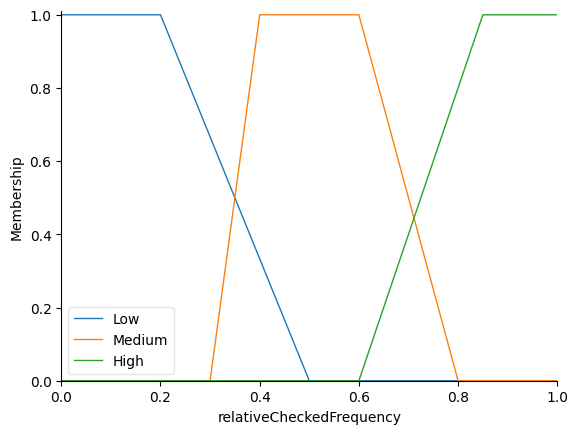

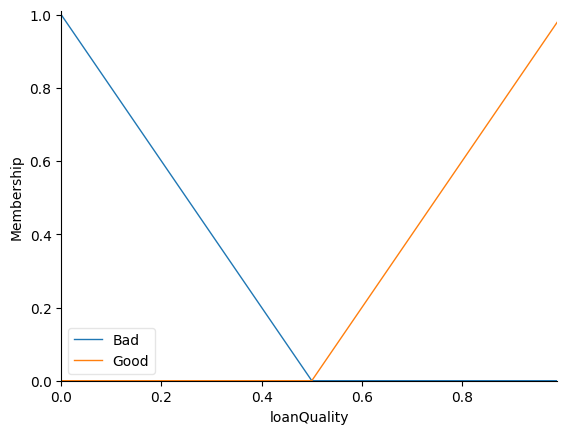

In [33]:
# Defining input variable "loanStatus"
# ['Defaulted Loan' 'Paid Off Loan' 'Uncertain Loan'] = [-1, 1, 0]
loanStatus = ctrl.Antecedent(np.arange(-1, 2, 1), 'loanStatus') # universe = [-1, 0, 1]
loanStatus['Defaulted'] = fuzz.trimf(loanStatus.universe, [-1, -1, -0.5])
loanStatus['Uncertain'] = fuzz.trimf(loanStatus.universe, [-0.5, 0, 0])
loanStatus['Paid Off'] = fuzz.trimf(loanStatus.universe, [1, 1, 1])


# relativeCheckedFrequency range from 0 to 1.
relativeCheckedFrequency = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'relativeCheckedFrequency') # universe = [0,1]
relativeCheckedFrequency['Low'] = fuzz.trapmf(relativeCheckedFrequency.universe, [0, 0, 0.2, 0.5])
relativeCheckedFrequency['Medium'] = fuzz.trapmf(relativeCheckedFrequency.universe, [0.3,0.4, 0.6, 0.8])
relativeCheckedFrequency['High'] = fuzz.trapmf(relativeCheckedFrequency.universe, [0.6,0.85, 1, 1])

# Define output variable "loanQuality"
loanQuality = ctrl.Consequent(np.arange(0,1,0.01), 'loanQuality')
loanQuality['Bad'] = fuzz.trimf(loanQuality.universe, [0, 0, 0.5])
loanQuality['Good'] = fuzz.trimf(loanQuality.universe, [0.5, 1, 1])

# Visualize the membership function of loanStatus, relativeCheckedFrequency and loanQuality
loanStatus.view()
relativeCheckedFrequency.view()
loanQuality.view()

# Define fuzzy rules
rule1 = ctrl.Rule(loanStatus['Defaulted']                                    ,    loanQuality['Bad']) # Defaulted a loan once, will be considered as a bad loan borrower
rule2 = ctrl.Rule(loanStatus['Paid Off']    & relativeCheckedFrequency['Low'],    loanQuality['Bad']) # We assume this borrower had gone through hard times to pay off the loan
rule3 = ctrl.Rule(loanStatus['Paid Off']    & relativeCheckedFrequency['High'],   loanQuality['Good']) 
rule4 = ctrl.Rule(loanStatus['Uncertain']   & relativeCheckedFrequency['Low'],    loanQuality['Bad'])
rule5 = ctrl.Rule(loanStatus['Uncertain']   & relativeCheckedFrequency['High'],   loanQuality['Good'])
rule6 = ctrl.Rule(loanStatus['Paid Off']   & relativeCheckedFrequency['Medium'],    loanQuality['Good']) # We still considered Good Loan because the borrower had paid off the loan eventually with acceptable checked repayment frequency.
rule7 = ctrl.Rule(loanStatus['Uncertain']   & relativeCheckedFrequency['Medium'],    loanQuality['Bad']) # We considered Bad Loan (to be conservative) because the borrower was just only starting his repayment, but he is already showing bad credit.

# Create control system with all 6 rules
loanQuality_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])

# Create simulation
loanQuality_sim = ctrl.ControlSystemSimulation(loanQuality_ctrl)


[0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663, 0.16666666666666663]
<class 'list'>
<class 'list'>


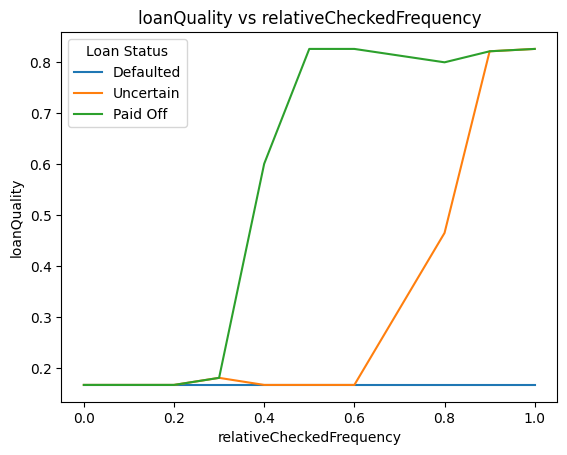

In [34]:
# Visualize 
# Calculate the loanQuality with relativeCheckedFrequency range from 0 to 1 in a for loop with addition of 0.1
loanQuality_Defaulted = []
loanQuality_Uncertain = []
loanQuality_Paid_Off = []
relativeCheckedFrequency = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0]

for loanStatus_variable in [-1, 0, 1]:
    for relativeCheckedFrequency_variable in np.arange(0, 1, 0.1):
        loanQuality_sim.input['relativeCheckedFrequency'] = relativeCheckedFrequency_variable
        loanQuality_sim.input['loanStatus'] = loanStatus_variable
        # Perform the simulation
        loanQuality_sim.compute()
        # Collect the output
        if (loanStatus_variable == -1):
            loanQuality_Defaulted.append(loanQuality_sim.output['loanQuality'])
        elif (loanStatus_variable == 0):
            loanQuality_Uncertain.append(loanQuality_sim.output['loanQuality'])
        else:
            loanQuality_Paid_Off.append(loanQuality_sim.output['loanQuality'])

print(loanQuality_Defaulted)
print(type(loanQuality_Defaulted))
print(type(relativeCheckedFrequency))

# Plot 3 graphs in one figure
plt.plot(relativeCheckedFrequency, np.array(loanQuality_Defaulted), label='Defaulted')
plt.plot(relativeCheckedFrequency, np.array(loanQuality_Uncertain), label='Uncertain')
plt.plot(relativeCheckedFrequency, np.array(loanQuality_Paid_Off), label='Paid Off')
plt.legend(title='Loan Status')
plt.xlabel('relativeCheckedFrequency')
plt.ylabel('loanQuality')
plt.title('loanQuality vs relativeCheckedFrequency')
plt.show()

# # generate 3d surface plot
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm

# # Create a 3D figure
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Create a meshgrid of the input variables
# rf, ls = np.meshgrid(relativeCheckedFrequency, [-1, 0, 1])

# # Evaluate the loanQuality for each combination of input variables
# loanQuality = np.zeros_like(rf)
# for i in range(len(relativeCheckedFrequency)):
#     for j in range(3):
#         loanQuality[i, j] = loanQuality_sim.output['loanQuality']

# # Plot the surface
# surf = ax.plot_surface(rf, ls, loanQuality, cmap=cm.coolwarm)

# # Add labels and title
# ax.set_xlabel('relativeCheckedFrequency')
# ax.set_ylabel('loanStatus')
# ax.set_zlabel('loanQuality')
# ax.set_title('loanQuality vs relativeCheckedFrequency and loanStatus')

# # Add a colorbar
# fig.colorbar(surf)

# # Show the plot
# plt.show()








After building the fuzzy logic, we will use the fuzzy logic to synthesize the target variable and y.

In [35]:
# For modeldf, we will create a new column "loanQuality" to store the fuzzy output
# Then we will calculate each rows "loanQuality" by using "loanStatus" and "relativeCheckedFrequency" as input
y = modeldf[['loanStatus','relativeCheckedFrequency']]
y['loanQuality'] = 0.0

for index, row in y.iterrows():
    loanQuality_sim.input['relativeCheckedFrequency'] = row['relativeCheckedFrequency']
    loanQuality_sim.input['loanStatus'] = row['loanStatus']
    loanQuality_sim.compute()
    y.at[index, 'loanQuality'] = loanQuality_sim.output['loanQuality']

# Show y with loanStatus -1
y

/var/folders/4g/jfvz9fnd7blddks5n_g5qm3r0000gn/T/ipykernel_40223/3570018362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['loanQuality'] = 0.0


,loanStatus,relativeCheckedFrequency,loanQuality
0,1,0.880000,0.826667
1,0,0.538462,0.166667
2,0,0.000000,0.166667
3,1,0.076923,0.166667
4,1,1.000000,0.826667
...,...,...,...
38959,1,0.214286,0.167027
38960,1,0.142857,0.166667
38961,1,1.000000,0.826667
38962,0,0.384615,0.170085


### 2.5.3 Prepare X and y 

In [36]:
# Drop loanStatus and relativeCheckedFrequency columns, left only loanQuality column as the final target variable
y.drop(['loanStatus', 'relativeCheckedFrequency'], axis=1, inplace=True)

X = modeldf.drop(['loanStatus', 'relativeCheckedFrequency'], axis=1, inplace=True)

print(X)
print(y)

None
       loanQuality
0         0.826667
1         0.166667
2         0.166667
3         0.166667
4         0.826667
...            ...
38959     0.167027
38960     0.166667
38961     0.826667
38962     0.170085
38963     0.166667

[38964 rows x 1 columns]


/var/folders/4g/jfvz9fnd7blddks5n_g5qm3r0000gn/T/ipykernel_40223/1076382228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.drop(['loanStatus', 'relativeCheckedFrequency'], axis=1, inplace=True)


### 2.5.4 Train Test Split

In [37]:
# split X and y as train and test set 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(modeldf, y, test_size=0.2, random_state=42)


# Data Modeling

## DT REGRESSOR, SVR, GBR, NN, RF

In [38]:
# Initialize models
models = {'Decision Tree Regressor': DecisionTreeRegressor(random_state=11),
          'SVR': SVR(kernel='rbf'),
          'Gradient Boosting Regressors': GradientBoostingRegressor(random_state=0),
          'Neural Network': MLPRegressor(max_iter=1000, random_state=11),
          'Random Forest Regressor': RandomForestRegressor(random_state=11)
          }
for name, model in models.items():
    # Fit models to train 
    model.fit(X_train, y_train)
    # predict on test set
    y_pred = model.predict(X_test)
    # Calculate root mean squared error
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'{name} RMSE: {rmse}')
    # Plot the resulting ROC graph & calculate AUC    

Decision Tree Regressor RMSE: 0.3112252575030789


/Users/ahdean/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR RMSE: 0.252290375649619


/Users/ahdean/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressors RMSE: 0.2280285909574396


/Users/ahdean/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network RMSE: 0.471101580626566


/var/folders/4g/jfvz9fnd7blddks5n_g5qm3r0000gn/T/ipykernel_40223/689483169.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Regressor RMSE: 0.23580076850873635


## Deep Learning Model

In [40]:
# Ensure the data is in the right format (numpy array)
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)
X_train_np = X_train_np.astype('float32')
y_train_np = y_train_np.astype('float32')
X_test_np = X_test_np.astype('float32')
y_test_np = y_test_np.astype('float32')

# Define the model
dl_model = Sequential()
dl_model.add(Dense(32, input_dim=X_train_np.shape[1], activation='relu'))  # Input layer
dl_model.add(Dense(16, activation='relu'))  # Hidden layer
dl_model.add(Dense(1))  # Output layer

# Compile the model
dl_model.compile(loss='mean_squared_error', optimizer=Adam())

# Train the model
dl_model.fit(X_train_np, y_train_np, epochs=50, batch_size=10, verbose=1)

# Predict on the test set
y_pred_dl = dl_model.predict(X_test_np)

# Calculate RMSE
mse_dl = mean_squared_error(y_test_np, y_pred_dl)
rmse_dl = np.sqrt(mse_dl)

print(f'Root Mean Squared Error for Deep Learning model: {rmse_dl}')

Epoch 1/50
3118/3118 [==============================] - 2s 425us/step - loss: 146.4851
Epoch 2/50
3118/3118 [==============================] - 1s 420us/step - loss: 9.8269
Epoch 3/50
3118/3118 [==============================] - 1s 407us/step - loss: 5.4017
Epoch 4/50
3118/3118 [==============================] - 1s 401us/step - loss: 5.3102
Epoch 5/50
3118/3118 [==============================] - 1s 402us/step - loss: 2.6387
Epoch 6/50
3118/3118 [==============================] - 1s 403us/step - loss: 1.9028
Epoch 7/50
3118/3118 [==============================] - 1s 418us/step - loss: 1.2849
Epoch 8/50
3118/3118 [==============================] - 1s 405us/step - loss: 1.1538
Epoch 9/50
3118/3118 [==============================] - 1s 399us/step - loss: 0.4832
Epoch 10/50
3118/3118 [==============================] - 1s 402us/step - loss: 0.7803
Epoch 11/50
3118/3118 [==============================] - 1s 406us/step - loss: 0.3155
Epoch 12/50
3118/3118 [==============================] - 1s 4

Thus, we will use Gradient Boosting Regressors as it has the lowest RMSE.

# Model Evaluation

# Visual Feature Importance

In [44]:

# Initialize the model
model = GradientBoostingRegressor(random_state=0)

# Fit the model
model.fit(X_train, y_train)

/Users/ahdean/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=0)

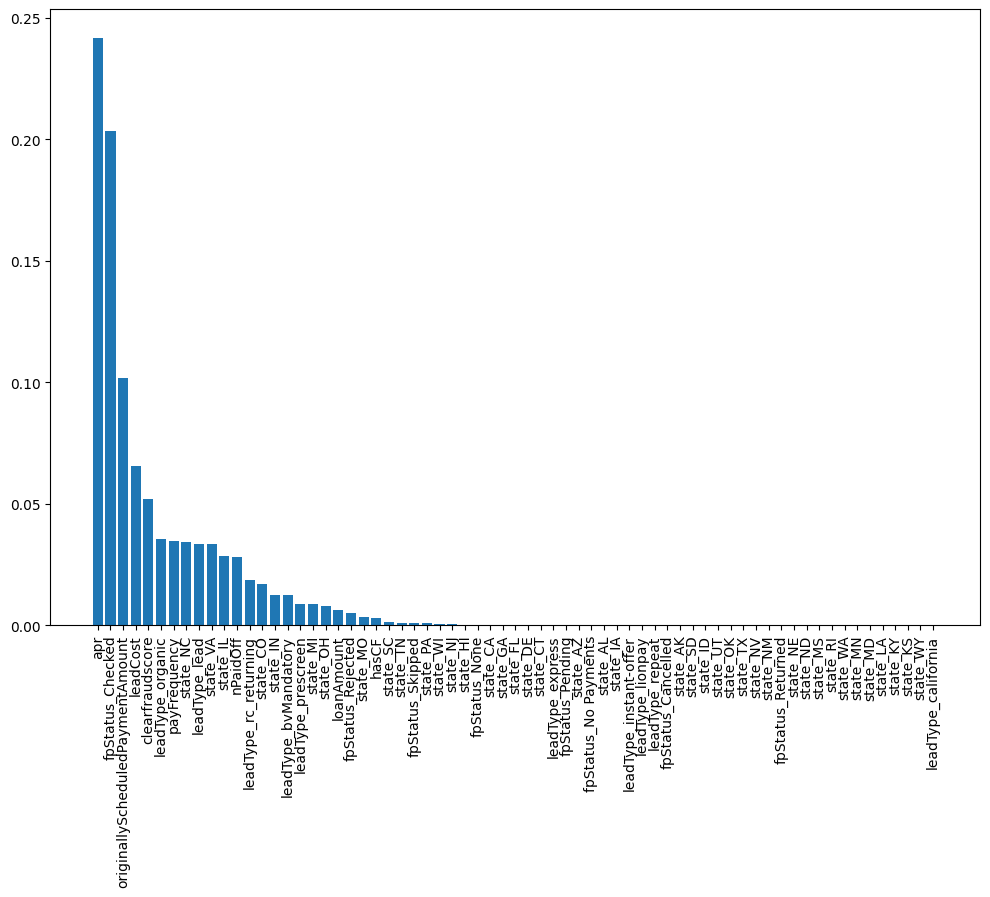

In [45]:
# Visualizing the feature importances of Gradient Boosting Regressor
# Get the feature importances
importances = model.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels
labels = np.array(X_train.columns)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)

# Increase the size of the plot
plt.rcParams['figure.figsize'] = (12, 20)

plt.show()